### Random Forest
Random forests are a way of averaging multiple deep decision trees, trained on different parts of the same training set, with the goal of reducing the variance. This comes at the expense of a small increase in the bias and some loss of interpretability, but generally greatly boosts the performance in the final model. Trees that are grown very deep tend to learn highly irregular patterns: they overfit their training sets, i.e. have low bias, but very high variance. Random forests are a way of averaging multiple deep decision trees, trained on different parts of the same training set, with the goal of reducing the variance.

The training algorithm for random forests applies the general technique of bootstrap aggregating, or bagging, to tree learners. Given a training set X with responses Y  bagging repeatedly (B times) selects a random sample with replacement of the training set and fits trees to these samples:

Sample, with replacement, n training examples from X, Y; call these Xb, Yb.
Random Forest trains a classification or regression tree fb on Xb, Yb.
After training, predictions for unseen samples x' can be made by averaging the predictions from all the individual regression trees on x' or by taking the majority vote in the case of classification trees.

In [1]:
from sklearn.datasets import load_wine
import pandas as pd

In [2]:
wine =load_wine()
names=list(wine['feature_names'])
X=wine['data']
df = pd.DataFrame(X, columns=names)

In [3]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [4]:
df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000

In [5]:
for col in df.columns:
    print('column:', col, '% of missing', sum(df[col].isna())/len(df[col])*100, '%')

column: alcohol % of missing 0.0 %
column: malic_acid % of missing 0.0 %
column: ash % of missing 0.0 %
column: alcalinity_of_ash % of missing 0.0 %
column: magnesium % of missing 0.0 %
column: total_phenols % of missing 0.0 %
column: flavanoids % of missing 0.0 %
column: nonflavanoid_phenols % of missing 0.0 %
column: proanthocyanins % of missing 0.0 %
column: color_intensity % of missing 0.0 %
column: hue % of missing 0.0 %
column: od280/od315_of_diluted_wines % of missing 0.0 %
column: proline % of missing 0.0 %


In [19]:
from sklearn.model_selection import train_test_split
y = wine.target
X = wine.data


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

def rand_forest_model(X, y, max_depth, n_estimators, min_samples_leaf):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
    rand_forest = RandomForestClassifier(max_depth=max_depth, random_state=101, n_estimators=n_estimators, min_samples_leaf=min_samples_leaf)
    rand_forest.fit(X_train, y_train)
    y_pred = rand_forest.predict(X_test)
    y_score = rand_forest.predict_proba(X_test)
    
    return f1_score(y_test, y_pred, average='macro')

In [25]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
rand_forest_model(X,y, 3, 200, 4)# on a toy dataset very basic model without any tuning 
#gives almost perfect results

0.9837010534684953

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Import some data to play with
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)
rand_forest = RandomForestClassifier(max_depth=4, random_state=0, n_estimators=200, min_samples_leaf=4)
# Learn to predict each class against the other
classifier = OneVsRestClassifier(rand_forest)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

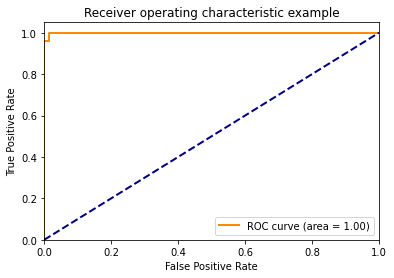

In [35]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

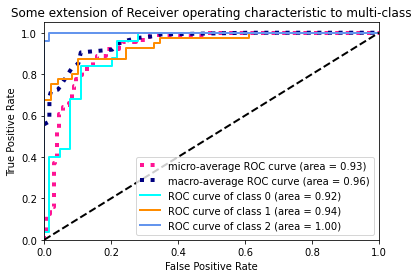

In [36]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

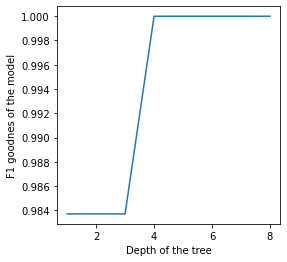

In [33]:
# Now we will try to see how f1 changes when we tune the hyperparameters
import matplotlib.pyplot as plt
import numpy as np

max_depth = [1,2,3,4,5,6,7,8]
f1 = []
for depth in max_depth:
    f1.append(rand_forest_model(X, y, depth, 200, 4))
plt.figure(figsize=(4,4))
plt.plot(max_depth, f1)
plt.xlabel('Depth of the tree') 
plt.ylabel('F1 goodnes of the model');


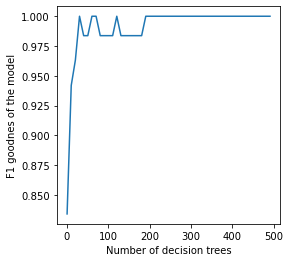

In [32]:
n_estimators = np.arange(1,500,10).tolist()
f1 = []
for num_of_trees in n_estimators:
    f1.append(rand_forest_model(X, y, 4, num_of_trees , 4))
plt.figure(figsize=(4,4))
plt.plot(n_estimators, f1)
plt.xlabel('Number of decision trees') 
plt.ylabel('F1 goodnes of the model');

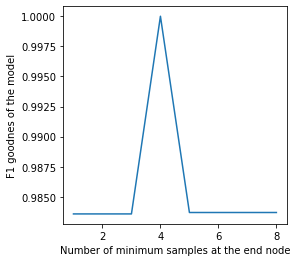

In [35]:
min_samples_leaf = [1,2,3,4,5,6,7,8]
f1 = []
for samples_leaf in min_samples_leaf:
    f1.append(rand_forest_model(X, y, 4, 300, samples_leaf))
plt.figure(figsize=(4,4))
plt.plot(min_samples_leaf, f1)
plt.xlabel('Number of minimum samples at the end node') 
plt.ylabel('F1 goodnes of the model');

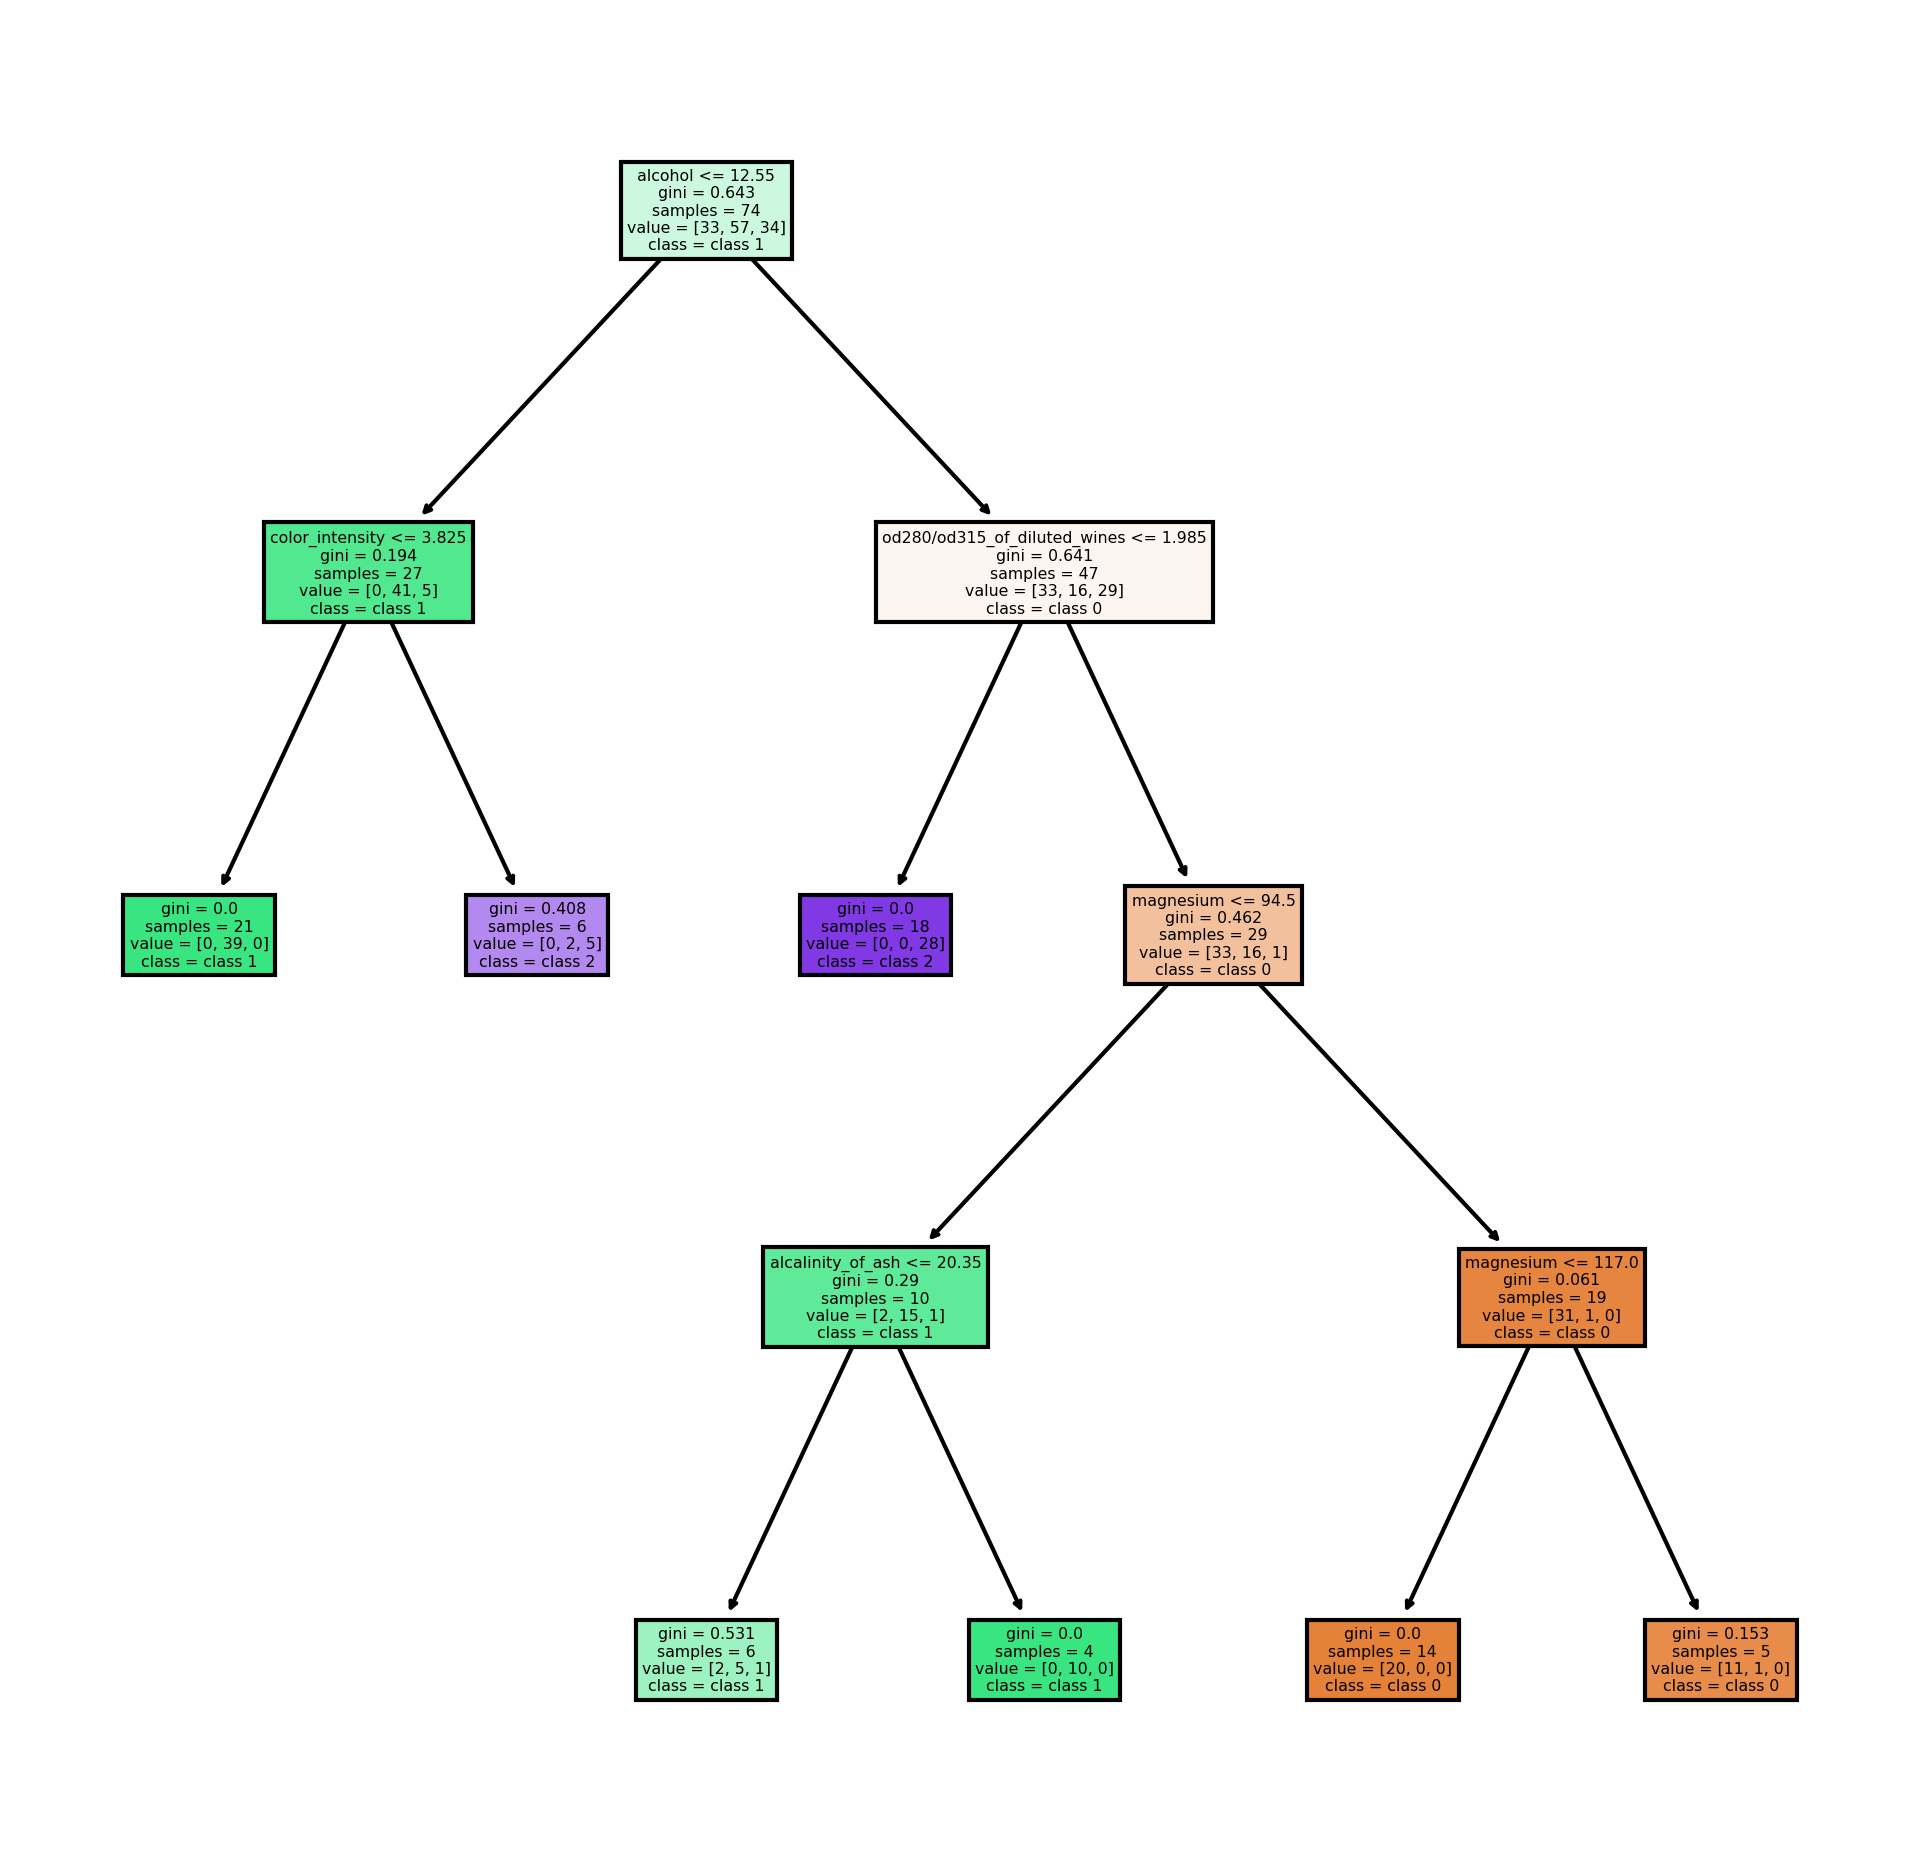

In [70]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
#for visualisation we select the best parameters
rand_forest = RandomForestClassifier(max_depth=4, random_state=101, n_estimators=300, min_samples_leaf=4)
rand_forest.fit(X_train, y_train)
y_pred = rand_forest.predict(X_test)
y_score = rand_forest.predict_proba(X_test)


colnames= names

dot_data = StringIO()

dtree = rand_forest.estimators_[100] # we extract 100th decicion tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=300)
tree.plot_tree(dtree,
               feature_names = colnames, 
               class_names=['class 0', 'class 1', 'class 2'],
               filled = True)
fig.savefig('tree.png');


In [56]:
tree.export_graphviz(dtree,
                     out_file="tree.dot",
                     feature_names = colnames, 
                     class_names=['class 0', 'class 1', 'class 2'],
                     filled = True)

In [57]:
!dot -Tpng tree.dot -o tree.png

<img src="tree.png" style="height:400px">

In [81]:
fn=wine.feature_names
cn=wine.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=3000)
for index in range(0, 5):
    tree.plot_tree(rand_forest.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);
    
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')